<a href="https://colab.research.google.com/github/ishwari215/mlcsv1/blob/main/6894100_MLDM_Week7_Lab_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLDM Lab week 7: Rule Induction, Relational Learning and ILP

<h3> <font color="blue"> Lab goals</font> </h3>
<p> 1.  Learn how to extract rules from decision trees. </p>
<p> 2. Testing the installation of SWI-Prolog and Janus, a Python SWI-Prolog interface using Aleph on the train problem. (in this lab session we assume that you completed the installation of SWI-Prolog and 'janus' as part of your lab exercise last week) </p>
<p> 3. Learn how to use cross-validation using Aleph on the Mutagenecity problem with different background knowledge</p>

## <font color="blue"> Extracting rules from decision trees
In this experiment we re-visit the the Iris dataset. We load the dataset directly from the scikit-learn datasets. In this dataset, the classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.
    
As demonstrated in Week 2 lab session, a decision tree can be visualied using `plot_tree` (or by exporting the tree in Graphviz format as shown <a href="https://scikit-learn.org/stable/modules/tree.html#classification">here</a>.
    
Alternatively, the tree can also be exported in textual format with the function `export_text` as shown in the example below:


In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
iris = load_iris()
print(iris['feature_names'])
decision_tree = DecisionTreeClassifier(random_state=0, ccp_alpha=0.01)
decision_tree = decision_tree.fit(iris.data, iris.target)
r = export_text(decision_tree, feature_names=iris['feature_names'])
print(r)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
|--- petal width (cm) <= 0.80
|   |--- class: 0
|--- petal width (cm) >  0.80
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- class: 2



A decision tree can be converted into a set of rules. Each leaf of the tree corresponds to a rule and the conditions of that rule are the conditions on the path from the root of the tree to that leaf.

Using this approach the decision tree above can be converted into the following rules:

IF (petal width (cm) <= 0.80) THEN class=0

IF (petal width (cm) >  0.80) AND (petal width (cm) <= 1.75) AND (petal length (cm) <= 4.95) AND (petal width (cm) <= 1.65) THEN class=1

IF (petal width (cm) >  0.80) AND (petal width (cm) <= 1.75) AND (petal length (cm) <= 4.95) AND (petal width (cm) > 1.65) THEN class=2

IF (petal width (cm) >  0.80) AND (petal width (cm) <= 1.75) AND (petal length (cm) > 4.95) THEN class=2

IF (petal width (cm) >  0.80) AND (petal width (cm) > 1.75) THEN class=2

Note that some of numerical range conditions above are redundant and could be simplified, e.g. (petal width (cm) >  0.80) AND (petal width (cm) > 1.65) can be replaced by (petal width (cm) > 1.65).

<h3><font color="red">Exercise 1 </font> </h3>
<p>Generate a set of rules for the breast cancer dataset, by learning a decision tree classifier  and then converting the tree into a set of rules suing the approach described above. You can prune the tree (using an optimal `ccp_alpha` value, e.g. from Excercis 4 in Week 2) before converting it into a set of rules.</p>

<p>Use the code cell below to write your code for Exercise 1</p>

In [2]:
# Answer to Excercise 1

from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Loading dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Splitting data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Training a decision tree classifier
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

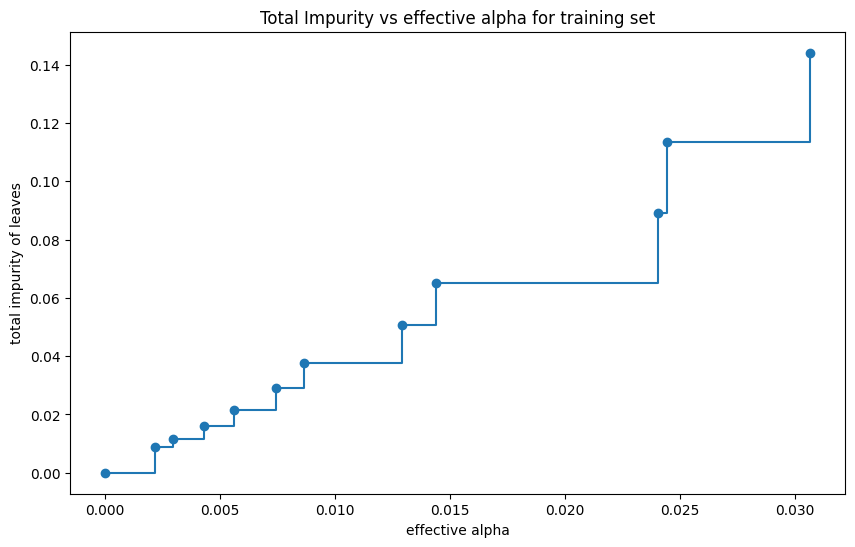

In [4]:
# Plotting the ccp_alpha vs impurities
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
plt.xlabel('effective alpha')
plt.ylabel('total impurity of leaves')
plt.title('Total Impurity vs effective alpha for training set')
plt.show()

In [5]:
# Using optimal ccp_alpha from the graph
optimal_ccp_alpha = ccp_alphas[impurities.argmin()]
print(optimal_ccp_alpha)
clf_pruned = DecisionTreeClassifier(random_state=0, ccp_alpha=optimal_ccp_alpha)
clf_pruned.fit(X_train, y_train)

0.0


DecisionTreeClassifier(ccp_alpha=np.float64(0.0), random_state=0)

<p><b>The rule set for Excercise 1:</b></p>
<p>IF mean concave points <= 0.05 AND worst radius <= 16.83 AND radius error <= 0.63 AND worst smoothness <= 0.18 AND smoothness error <= 0.00 AND worst concavity <= 0.19 THEN class=1
</p>
<p>IF mean concave points <= 0.05 AND worst radius <= 16.83 AND radius error <= 0.63 AND worst smoothness <= 0.18 AND smoothness error <= 0.00 AND worst concavity > 0.19 THEN class=0
</p>
<p>IF mean concave points <= 0.05 AND worst radius <= 16.83 AND radius error <= 0.63 AND worst smoothness <= 0.18 AND smoothness error > 0.00 AND worst texture <= 33.35 THEN class=1
</p>
<p>IF mean concave points <= 0.05 AND worst radius <= 16.83 AND radius error <= 0.63 AND worst smoothness <= 0.18 AND smoothness error > 0.00 AND worst texture > 33.35 AND worst texture <= 33.56 THEN class=0
</p>
<p>IF mean concave points <= 0.05 AND worst radius <= 16.83 AND radius error <= 0.63 AND worst smoothness <= 0.18 AND smoothness error > 0.00 AND worst texture > 33.56 THEN class=1
</p>
<p>IF mean concave points <= 0.05 AND worst radius <= 16.83 AND radius error <= 0.63 AND worst smoothness > 0.18 THEN class=0
</p>
<p>IF mean concave points <= 0.05 AND worst radius <= 16.83 AND radius error > 0.63 AND smoothness error <= 0.01 THEN class=1
</p>
<p>IF mean concave points <= 0.05 AND worst radius <= 16.83 AND radius error > 0.63 AND smoothness error > 0.01 THEN class=0
</p>
<p>IF mean concave points <= 0.05 AND worst radius > 16.83 AND worst texture <= 19.91 THEN class=1
</p>
<p>IF mean concave points <= 0.05 AND worst radius > 16.83 AND worst texture > 19.91 AND concave points error <= 0.01 THEN class=0
</p>
<p>IF mean concave points <= 0.05 AND worst radius > 16.83 AND worst texture > 19.91 AND concave points error > 0.01 THEN class=1
</p>
<p>IF mean concave points > 0.05 AND worst concave points <= 0.15 AND worst perimeter <= 115.25 AND mean texture <= 21.06 THEN class=1
</p>
<p>IF mean concave points > 0.05 AND worst concave points <= 0.15 AND worst perimeter <= 115.25 AND mean texture > 21.06 THEN class=0
</p>
<p>IF mean concave points > 0.05 AND worst concave points <= 0.15 AND worst perimeter > 115.25 THEN class=0
</p>
<p>IF mean concave points > 0.05 AND worst concave points > 0.15 AND fractal dimension error <= 0.01 THEN class=0
</p>
<p>IF mean concave points > 0.05 AND worst concave points > 0.15 AND fractal dimension error > 0.01 THEN class=1
</p>

## <font color="blue"> Preparations for Relational Learning
    
In this lab session, we will install SWI-Prolog and 'Janus', a Python SWI-Prolog interface, in preparation for the Relational Learning lab next week. We also test these installations using the ILP system Aleph on the train problem.

### <font color="blue"> SWI-Prolog

If you are using the Linux machines in the labs, SWI-Prolog is already installed on the Linux lab machines. This is free software, and you can also install it on your own computer. Please visit the SWI-Prolog website for more information:
https://www.swi-prolog.org/download/stable
    
If you have not used Prolog before, you may start from the beginner's tutorial:
https://www.swi-prolog.org/pldoc/man?section=quickstart
    
    
You may also find the SWISH graphical interface and the examples useful:
https://swish.swi-prolog.org/example/examples.swinb
    
    
### <font color="blue"> Janus
    
This package implements a bi-directional interface between Prolog and Python using portable low-level primitives. The aim is to make Python available to Prolog and vice versa with minimal installation effort while providing a high level bi-directional interface with good performance.

We need to install 'Janus' library to be able to use the Realtional Learning and ILP systems which are implemented in Prolog (e.g Aleph) within a Jupyter notebook.

More information about Janus can be found from the following website:
https://www.swi-prolog.org/pldoc/doc_for?object=section(%27packages/janus.html%27)
    
You can install Janus using one of the following commands:  

```!pip install janus-swi ```

or

```!pip3 install janus-swi```

or (Directly from the source code)

```!pip3 install git+https://github.com/SWI-Prolog/packages-swipy.git#egg=janus_swi```

In [6]:
!add-apt-repository -y ppa:swi-prolog/stable

PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/swi-prolog/stable/ubuntu/ jammy main'
Description:
Comprehensive Prolog implementation with extensive libraries and development tools.   Primarily targetted at teaching, RDF processing and web-related tasks, such as creating web services or analysing web content.

Official PPAs for SWI-Prolog. See https://www.swi-prolog.org for further information.
More info: https://launchpad.net/~swi-prolog/+archive/ubuntu/stable
Adding repository.
Adding deb entry to /etc/apt/sources.list.d/swi-prolog-ubuntu-stable-jammy.list
Adding disabled deb-src entry to /etc/apt/sources.list.d/swi-prolog-ubuntu-stable-jammy.list
Adding key to /etc/apt/trusted.gpg.d/swi-prolog-ubuntu-stable.gpg with fingerprint E8B739E3753FF4A12360BA6A4AB3A5F60EA9AEB3
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/

In [7]:
!apt-get update

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/swi-prolog/stable/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry 

In [8]:
!apt-get install swi-prolog

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libedit-dev libgmp-dev libgmpxx4ldbl libossp-uuid16 swi-prolog-nox swi-prolog-x
Suggested packages:
  gmp-doc libgmp10-doc libmpfr-dev uuid prolog-el
The following NEW packages will be installed:
  libedit-dev libgmp-dev libgmpxx4ldbl libossp-uuid16 swi-prolog swi-prolog-nox swi-prolog-x
0 upgraded, 7 newly installed, 0 to remove and 32 not upgraded.
Need to get 7,368 kB of archives.
After this operation, 38.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libedit-dev amd64 3.1-20210910-1build1 [118 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgmpxx4ldbl amd64 2:6.2.1+dfsg-3ubuntu1 [9,580 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libgmp-dev amd64 2:6.2.1+dfsg-3ubuntu1 [337 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libossp-uuid16 a

In [9]:
!apt-get install -y build-essential

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
build-essential is already the newest version (12.9ubuntu3).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.


In [10]:
!pip install janus_swi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for janus_swi: filename=janus_swi-1.5.2-cp311-cp311-linux_x86_64.whl size=156193 sha256=47881c1ce66002121126801d498e76ec9a9a236948ebcd54da24268e02cf49b0
  Stored in directory: /root/.cache/pip/wheels/64/aa/bd/1a1dfdb816b21906027aee730b1a5600deafa0f445cc83506b
Successfully built janus_swi


### <font color="blue"> Aleph
    
Aleph is an Inductive Logic Programming (ILP) system developed by Ashwin Srinivasan: http://www.cs.ox.ac.uk/activities/machlearn/Aleph/

In this lab we use a porting of Aleph v.5 to SWI-Prolog prepared by Fabrizio Riguzzi:
https://github.com/friguzzi/aleph
    
Further preparations and the utilities to use Aleph with Python for this lab were implemented by Dany Varghese.

### <font color="blue"> PyILP

PyILP is  novel user-friendly Python/Jupyter interface for Inductive Logic programming(ILP) system for teaching relational machine learning and comparing different algorithms developed by Dany Varghese.
You can refer https://github.com/danyvarghese/PyILP for further information about PyILP.
    
You can install PyILP using one of the following commands:

In [11]:
!pip3 install PyILP

In [12]:
pip install Texttable

### <font color="blue"> Michalski’s trains problem

Michalski’s trains problem is a classic machine learning problem where the learning task is to discover a general pattern or rule that can be used to classify five eastbound trains vs five westbound trains as shown in the figure below.
        
![image.png](attachment:0fcc91e6-41ba-49dc-91fd-05936005a202.png)


This problem can be represented as a Relational Learning problem as shown below:
    
```
:-begin_in_pos. % Positive examples
eastbound(east1).
eastbound(east2).
eastbound(east3).
eastbound(east4).
eastbound(east5).
:-end_in_pos.
    
:-begin_in_neg. % Negative examples
eastbound(west6).
eastbound(west7).
eastbound(west8).
eastbound(west9).
eastbound(west10).
:-end_in_neg.
    
:-begin_bg. % Background knowledge
% type definitions
car(car_11).  car(car_12).  car(car_13).  car(car_14).
car(car_21).  car(car_22).  car(car_23).
car(car_31).  car(car_32).  car(car_33).
car(car_41).  car(car_42).  car(car_43).  car(car_44).
car(car_51).  car(car_52).  car(car_53).
car(car_61).  car(car_62).
car(car_71).  car(car_72).  car(car_73).
car(car_81).  car(car_82).
car(car_91).  car(car_92).  car(car_93).  car(car_94).
car(car_101).  car(car_102).

shape(elipse).  shape(hexagon).  shape(rectangle).  shape(u_shaped).
shape(triangle). shape(circle). shape(nil).

train(east1).  train(east2).  train(east3).  train(east4).  train(east5).
train(west6).  train(west7).  train(west8).  train(west9).  train(west10).


% eastbound train 1
short(car_12).
closed(car_12).
long(car_11).
long(car_13).
short(car_14).
open_car(car_11).
open_car(car_13).
open_car(car_14).
shape(car_11,rectangle).
shape(car_12,rectangle).
shape(car_13,rectangle).
shape(car_14,rectangle).
load(car_11,rectangle,3).
load(car_12,triangle,1).
load(car_13,hexagon,1).
load(car_14,circle,1).
wheels(car_11,2).
wheels(car_12,2).
wheels(car_13,3).
wheels(car_14,2).
has_car(east1,car_11).
has_car(east1,car_12).
has_car(east1,car_13).
has_car(east1,car_14).
...
```
See mtrain.pl for the full listing. In aprticular note the mode declarations. Mode declaration defines the hypothesis language and Progol/Aleph use this to constrain the search for clauses which subsume the bottom clause (⊥). They have the form modeh(n, atom) for the head atom or modeb(n, atom) for the body atoms, where n, the recall, is either an integer, n > 0, or ‘*’. Terms in the atom are either normal or place-marker. A place-marker is either +type, -type or #type, where +, - and # are for input, output and constant arguments respectively.

```
modeh(1,eastbound(+train)).
modeb(1,short(+car)).
modeb(1,closed(+car)).
modeb(1,long(+car)).
modeb(1,open_car(+car)).
modeb(1,double(+car)).
modeb(1,jagged(+car)).
modeb(1,shape(+car,#shape)).
modeb(1,load(+car,#shape,#int)).
modeb(1,wheels(+car,#int)).
modeb(*,has_car(+train,-car)).
```
    

Now copy 'aleph.pl', 'trains.pl',  'pos_example.pl' and 'neg_example.n' files to your current working directory (download and unzip Aleph_files_Week7.zip from SurreyLearn). Then run the code below to generate a rule and evaluate it's accuracy on the training examples.
</p>


In [13]:
from  PyILP.PyILP import *
model_1=aleph_learn(file="train.pl", positive_example="pos_example.f", negative_example="neg_example.n", test_size=0)

['eastbound(A) :-   has_car(A,B), short(B), closed(B).']
+----------+ Learning +----------+
+---------------------+------------------+------------------+
|       n = 10        | Positive(Actual) | Negative(Actual) |
+=====================+==================+==================+
| Positive(Predicted) | 5                | 0                |
+---------------------+------------------+------------------+
| Negative(Predicted) | 0                | 5                |
+---------------------+------------------+------------------+
+-------------+---+
|   Metric    | # |
+=============+===+
| Accuracy    | 1 |
+-------------+---+
| Precision   | 1 |
+-------------+---+
| Sensitivity | 1 |
+-------------+---+
| Specificity | 1 |
+-------------+---+
| F1 Score    | 1 |
+-------------+---+


If you have successfully installed SWI-Prolog and Janus the you should see the following output after running the code above:
```
['eastbound(A) :-   has_car(A,B), short(B), closed(B)']
accuracy :  1.0
```
Assuming that you have installed SWI-Prolog, you can also run Aleph on the trains problem at the command line. Call SWI-Prolog by typing 'swipl' at command line and then load the trains file (by consulting the file using ['mtrain.pl'] or [mtrain]) at the Prolog prompt and then the 'induce' command to induce a rule:

```
$ swipl
Welcome to SWI-Prolog (threaded, 64 bits, version 8.2.4)
SWI-Prolog comes with ABSOLUTELY NO WARRANTY. This is free software.
Please run ?- license. for legal details.

For online help and background, visit https://www.swi-prolog.org
For built-in help, use ?- help(Topic). or ?- apropos(Word).

?- [mtrain].
true.

?- induce.
...
```

In [14]:
!swipl

Welcome to SWI-Prolog (threaded, 64 bits, version 9.2.9)
SWI-Prolog comes with ABSOLUTELY NO WARRANTY. This is free software.
Please run ?- license. for legal details.

For online help and background, visit https://www.swi-prolog.org
For built-in help, use ?- help(Topic). or ?- apropos(Word).

].
true.

?- induce.
[select example] [1]
[sat] [1]
[eastbound(east1)]

[bottom clause]
eastbound(A) :-
   has_car(A,B), has_car(A,C), has_car(A,D), has_car(A,E), 
   short(E), short(C), closed(C), long(D), 
   long(B), open_car(E), open_car(D), open_car(B), 
   shape(E,rectangle), shape(D,rectangle), shape(C,rectangle), shape(B,rectangle), 
   wheels(E,2), wheels(D,3), wheels(C,2), wheels(B,2), 
   load(E,circle,1), load(D,hexagon,1), load(C,triangle,1), load(B,rectangle,3).
[literals] [25]
[saturation time] [0.0015403089999999897]
[reduce]
[best label so far] [[1,0,2,1]/0]
eastbound(A).
[5/5]
eastbound(A) :-
   has_car(A,B).
[5/5]
eastbound(A) :-
   has_car(A,B).
[5/5]
eastbound(A) :-
   has_ca

### <font color="blue"> Mutagenicity dataset
    
In this lab session we will look at the Mutagenicity Dataset as initially described in the following PNAS paper:
    
R.D. King, S.H. Muggleton, A. Srinivasan, and M.J.E. Sternberg. Structure-activity relationships derived by machine learning: the use of atoms and their bond connectives to predict mutagenicity by Inductive Logic Programming. Proceedings of the National Academy of Sciences, 93:438-442, 1996.
https://www.doc.ic.ac.uk/~shm/Papers/pnas96.pdf
    
Some drugs are mutagenicity active which means that they could lead to cancer. The aim of the machine learning task is to build a set of rules for predicting Mutagenicity of chemical compounds, using a set of known active and inactive molecules as positive and negative examples and the properties of the molecules (e.g. atom-bound structures) as the background knowledge.
    
![image-4.png](attachment:image-4.png)

The examples and the background knowledge have been encoded as relations in First-Order Logic. For examples, the following molecule (d1):
    
![image-5.png](attachment:image-5.png)
    
has been encoded using the following relations:
    
```    
atm(1, cl).
atm(2, c).
atm(3, c).
atm(4, c).
atm(5, c).
atm(6, c).
atm(8, o).
...
bond(3, 4, s).
bond(1, 2, s).
bond(2, 3, d).
…
```  

and after Adding molecule id, atom type (21, 52, ..), e-charge (0.297, ..) and bond type (single or double) we have:   
    
```  
atm(d1, d1_1, cl, 21, 0.297).
atm(d1, d1_2, c, 21, 0187).
atm(d1, d1_3, c, 21, -0.143).
atm(d1, d1_4, c, 21, -0.143).
atm(d1, d1_5, c, 21, -0.143).
atm(d1, d1_6, c, 21, -0.143).
atm(d1, d1_8, o, 52, 0.98).
...
bond(d1, d1_3, d1_4, s).
bond(d1, d1_1, d1_2, s).
bond(d1, d1_2, d1_3, d).
...
```    

Additional chemical functional groups and background knowledge, e.g Benzene rings can be also added. Table below shows some the rules from the 188 dataset used in PNAS paper mentioned above (the head of each rule is 'a molecule is mutagenecity active if'):
    
![image-12.png](attachment:image-12.png)      
    
In this lab session we use Aleph to learn some rule sets from the 188 dataset described in the paper above and we use cross-validation to evaluate the rules leanred by Aleph. In the first experiment we use a background knowledge consisiting of atom only information (B0) and compare the average accuracies from cross-validations tests when we include more background knowledge, i.e. atom-bond information (B1) and atom-bond and arithmetic constraints, i.e. equalities and inequalities (B2).
    
```
B0: atom only information
B1: B0 + bond information
B2: B1 + arithmetic constraints
```
    
These background information are provided in the Prolog files with the same names. Note that the difference in different files is in the Mode Declaration which defines the hypothesis language. For example below is the mode declarations for B0:
    
```
:- modeh(*, active(+drug)).
:- modeb(*,atm(+drug,-atomid,#element,#int,-charge)).
```
    
and for B1:
    
```
:- modeh(*, active(+drug)).
:- modeb(*,atm(+drug,-atomid,#element,#int,-charge)).
:- modeb(*,bond(+drug,-atomid,-atomid,#int)).
:- modeb(*,bond(+drug,+atomid,-atomid,#int)).
```
    
The training and test data have been also provided for each fold for a 10 fold cross-validation. All other required files including 'aleph.pl'  are also included in the zip file. Unzip and copy these into your current working directory (download and unzip Aleph_files_Week7.zip from SurreyLearn). Then run the code below which should generate the rules sets for B0, B1 and B2 and the accuracy box plots. Note that for the sake of time, we are doing a 5 fold cross-validation. The learning time for each BK type have been also plotted.
    

In [15]:
# compare algorithms
import warnings
warnings.filterwarnings('ignore')
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
#from sklearn.naive_bayes import GaussianNB
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.linear_model import Perceptron
#from sklearn.neural_network import MLPClassifier
#from sklearn.preprocessing import LabelEncoder
#from sklearn import  svm
#from sklearn.cluster import KMeans
#from sklearn import datasets
import pandas as pd
import numpy as np
import os
import collections
import pickle



****************** Rule sets generated by Aleph for the Mutagenicity Dataset using BK:   B0
['active(d57).active(A) :-   atm(A,B,c,27,C), atm(A,D,c,29,C).active(A) :-   atm(A,B,c,195,C).active(d169).active(d21).active(A) :-   atm(A,B,c,29,C), atm(A,D,c,10,C).active(d12).active(d83).active(A) :-   atm(A,B,c,10,C), atm(A,D,c,16,E).active(d164).active(A) :-   atm(A,B,c,27,C), atm(A,D,c,10,E).active(A) :-   atm(A,B,c,27,C), atm(A,D,c,26,E).active(A) :-   atm(A,B,c,29,C), atm(A,D,c,14,E).active(d145).active(A) :-   atm(A,B,n,32,C), atm(A,D,o,40,C).active(d6).active(d15).active(d87).active(d95).active(d187).active(A) :-   atm(A,B,c,29,C), atm(A,D,c,22,C).active(A) :-   atm(A,B,c,27,C), atm(A,D,o,45,E).active(d45).active(d54).active(d75).active(d140).active(d171).active(d24).active(d79).active(d163).active(d172).active(d37).active(d146).active(d50).active(d96).active(d117).active(d32).active(d167).active(d48).active(d60).active(d81).active(d103).active(d162).']
+----------+ Testing +-------

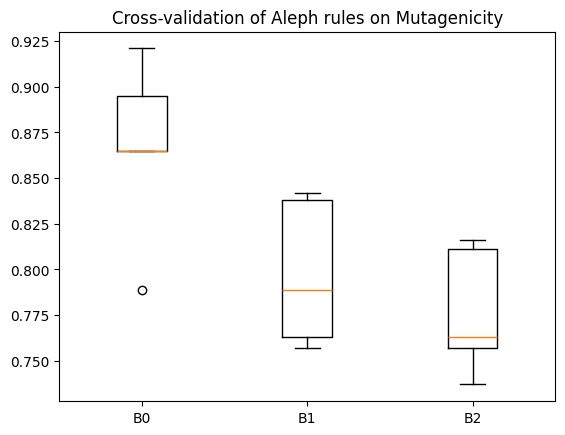

Text(0, 0.5, 'Learning time (Sec)')

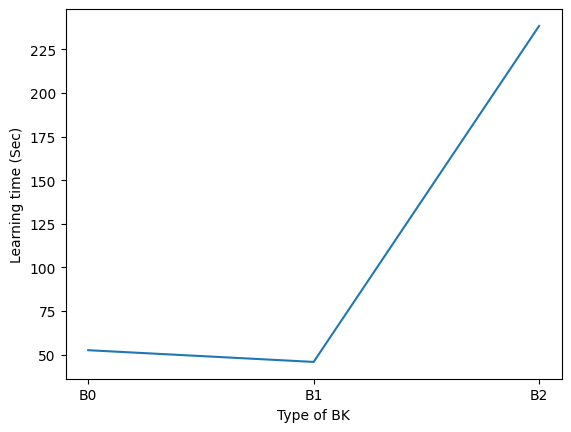

In [16]:
models = []
BK_0="B_0.pl"
BK_1="B_1.pl"
BK_2="B_2.pl"



models.append(('ILP',"B0", BK_0))
models.append(('ILP',"B1", BK_1))
models.append(('ILP',"B2", BK_2))

#print('****************  Mutagenicity Dataset ****************')
#pos, neg= aleph_pos_neg(pos_ex, neg_ex)
results1 = []
names1 = []
avg_time = []
for name, label, model in models:
    print("\n")
    print("****************** Rule sets generated by Aleph for the Mutagenicity Dataset using BK:  ", label)
    if name=="ILP":
        # can be changed to 10 fold which will take longer to finish
        model_1=aleph_cross_validation(model,  CV=5,  positive_example="pos_example_m.f",
                                       negative_example="neg_example_m.n")
        cv_results=model_1.accuracy
    else:
        kfold = StratifiedKFold(n_splits=10, random_state=1)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results1.append(cv_results)
    avg_time.append(model_1.time_learn)
    names1.append(label)
    print("\n")
pyplot.boxplot(results1, labels=names1)
pyplot.title('Cross-validation of Aleph rules on Mutagenicity')
pyplot.show()

pyplot.plot(names1,avg_time)
pyplot.xlabel("Type of BK")
pyplot.ylabel("Learning time (Sec)")

<h3><font color="red">Exercise 2 </font> </h3>
<p> Extend the background knowledge to include additional chemical functional groups and background knowledge, e.g Benzene rings. For this copy file 'B_2.pl' into 'B_3.pl' and uncomment the mode declarations for the additional background knowledge (all moded and determination lines). All Prolog caluses and facts related to the additional background knowledge have been already included in 'B_2.pl'. Then copy and modify the code above to include a new model B3 and plot the comparisons on accuracy and time.

<p> 1. Explain your observation of the accuracy/time results.</p>
<p> 2. Can you find any of the rules mentioned in Table 1 above by looking at the output rules for B3 ? You may need to run the 10 fold cross-validation (rathher than 5 folds above). You can also include all folds as training data in one go and then look at the output of Aleph in the ccommand line (or look at the Aleph output messages in the terminal you launched Jupyter). </p>


<p>Use the code cell below to write your code for Exercise 2 (you may need to restart the kernel for this exercise)</p>


Running cross-validation for B0...
['active(A) :-   atm(A,B,c,29,C), atm(A,D,c,10,E).active(A) :-   atm(A,B,c,27,C), atm(A,D,c,26,C).active(d94).active(d105).active(d173).active(d183).active(d29).active(A) :-   atm(A,B,c,22,C), atm(A,D,c,27,C).active(d57).active(A) :-   atm(A,B,c,27,C), atm(A,D,c,29,C).active(d169).active(d21).active(A) :-   atm(A,B,c,195,C).active(d12).active(d83).active(A) :-   atm(A,B,c,10,C), atm(A,D,c,16,E).active(d164).active(d166).active(A) :-   atm(A,B,c,29,C), atm(A,D,c,14,E).active(d145).active(A) :-   atm(A,B,n,32,C), atm(A,D,o,40,C).active(d6).active(d15).active(d87).active(d95).active(d187).active(A) :-   atm(A,B,c,27,C), atm(A,D,o,45,E).active(d45).active(d54).active(d75).active(d140).active(d171).active(d24).active(d79).active(d163).active(d172).active(d37).active(d146).active(d50).active(d96).active(d117).active(d32).active(d167).active(d48).active(d60).active(d81).active(d103).active(d162).']
+----------+ Testing +----------+
+---------------------+--

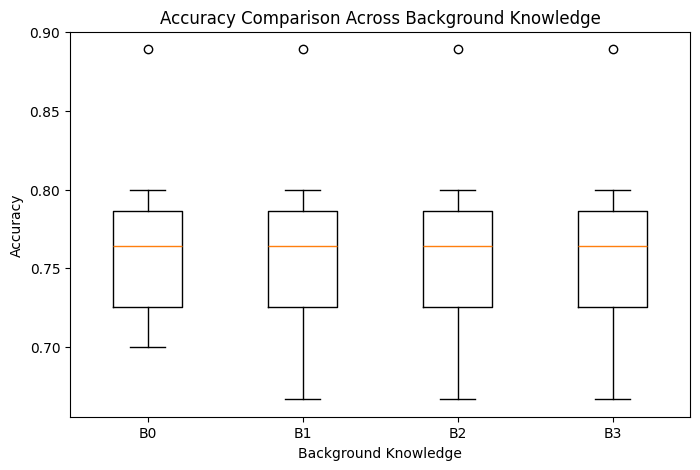

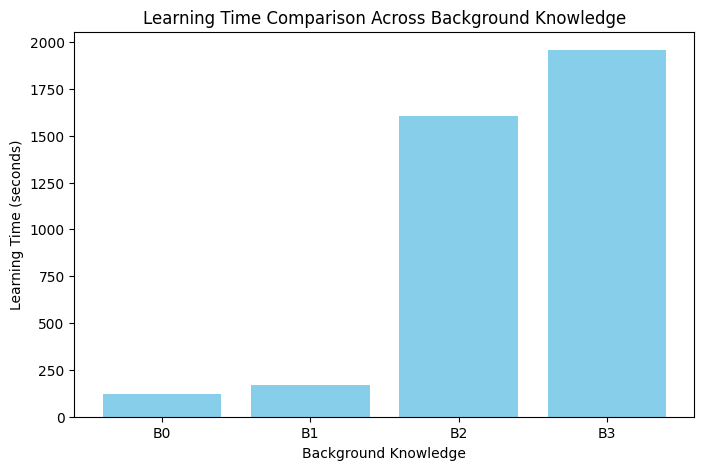

In [17]:
# Answer to Exercise 2
from PyILP.PyILP import aleph_cross_validation
from matplotlib import pyplot as plt


models = [
    ('ILP', 'B0', 'B_0.pl'),
    ('ILP', 'B1', 'B_1.pl'),
    ('ILP', 'B2', 'B_2.pl'),
    ('ILP', 'B3', 'B_3.pl'),
]

results = []
times = []
names = []


for model_type, label, file in models:
    print(f"\nRunning cross-validation for {label}...")
    model_cv = aleph_cross_validation(file, CV=10, positive_example="pos_example_m.f",
                                      negative_example="neg_example_m.n")
    results.append(model_cv.accuracy)
    times.append(model_cv.time_learn)
    names.append(label)


plt.figure(figsize=(8, 5))
plt.boxplot(results, labels=names)
plt.xlabel('Background Knowledge')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison Across Background Knowledge')
plt.show()

plt.figure(figsize=(8, 5))
plt.bar(names, times, color='skyblue')
plt.xlabel('Background Knowledge')
plt.ylabel('Learning Time (seconds)')
plt.title('Learning Time Comparison Across Background Knowledge')
plt.show()

<h3><font color="red"> *** BONUS Exercise *** (Extra mark for the 'individual commitment' element of the coursework)</font> </h3>
<p> The Mutagenicity problem described above consists of two datasets: 188 "regression friendly" compounds and 42 "regression unfriendly" compounds. The 42 "regression unfriendly" dataset is more challenging for machine learning algorithms which cannot use structural information (atom-bond) and relational learning (e.g Aleph) has been more useful on the 42 dataset. However, the 188 "regression friendly" dataset is not a challenging dataset and even without using the structural data one could learn accurate models using the numerical features Ind1, Inda, Logp and Lumo. Apply some non-relational learning algorithms (e.g. decision tree, Perceptron, MLP, SVM, etc) to the 188 dataset used in the exercise above and compare the accuracy/times with Aleph (using B3). For the 188 "regression friendly", you may just focus on the numerical features Ind1, Inda, Logp and Lumo and ignore the structural data. The program for creating a CSV file for these numerical features from Prolog facts has been provided in write_csv.pl (in the zip file).<p>

In [51]:
!swipl

Welcome to SWI-Prolog (threaded, 64 bits, version 9.2.9)
SWI-Prolog comes with ABSOLUTELY NO WARRANTY. This is free software.
Please run ?- license. for legal details.

For online help and background, visit https://www.swi-prolog.org
For built-in help, use ?- help(Topic). or ?- apropos(Word).

?- !ls
|    ls
|    ^C
^C


Action (h for help) ? ^C


In [53]:
import subprocess

# Execute Prolog script and call the w/1 predicate
command = "swipl -s write_csv.pl -g \"w('Mutagen_Num.CSV').\" -t halt."
process = subprocess.run(command, shell=True, capture_output=True, text=True)

# Output logs
print("STDOUT:\n", process.stdout)
print("STDERR:\n", process.stderr)



STDOUT:
 
STDERR:
 


In [63]:
!ls

aleph_original.pl  B_1.pl  mtrain.pl	    neg_example_m.n  pos_example_m.f  write_csv.pl
aleph.pl	   B_2.pl  muta.csv	    neg_example.n    sample_data
B_0.pl		   B_3.pl  Mutagen_Num.CSV  pos_example.f    train.pl


Columns: Index(['id', ' ind1', ' inda', ' logp', ' lumo', ' activity'], dtype='object')

Model Accuracy & Training Time:
Decision Tree: Accuracy = 0.8947, Time = 0.0023 seconds
MLP Classifier: Accuracy = 0.9211, Time = 0.5357 seconds
SVM: Accuracy = 0.8947, Time = 0.0024 seconds


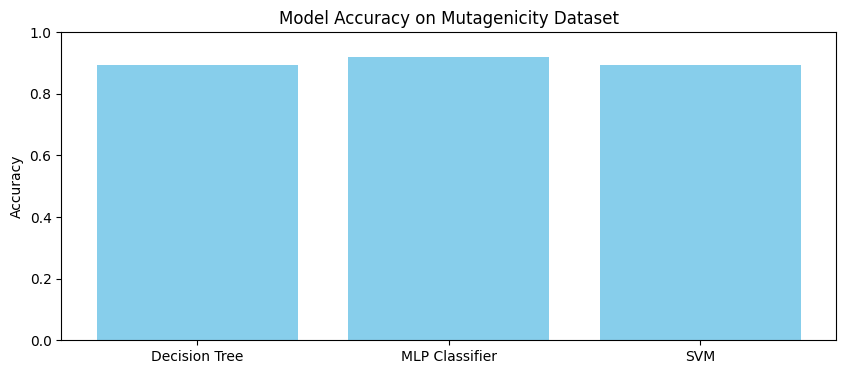

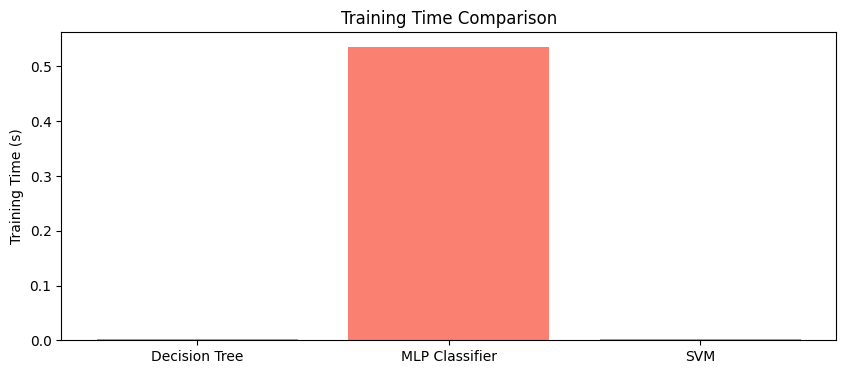

In [64]:
# BONUS EXERCISE: Compare ML models on muta.csv
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Load the data
data = pd.read_csv('muta.csv')

# Preview to confirm columns
print("Columns:", data.columns)

# Assuming correct column names; rename if needed
# Example: If the CSV has ' ind1' (with space), fix like this:
data.columns = data.columns.str.strip()

# Features and target
X = data[['ind1', 'inda', 'logp', 'lumo']]
y = data['activity']  # Make sure this column exists in lowercase

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'MLP Classifier': MLPClassifier(max_iter=1000),
    'SVM': SVC()
}

# Train, evaluate and time each model
results = {}
times = {}

for name, model in models.items():
    start = time.time()
    model.fit(X_train_scaled, y_train)
    end = time.time()

    acc = model.score(X_test_scaled, y_test)
    results[name] = acc
    times[name] = end - start

# Display results
print("\nModel Accuracy & Training Time:")
for name in models:
    print(f"{name}: Accuracy = {results[name]:.4f}, Time = {times[name]:.4f} seconds")

# Plot accuracy
plt.figure(figsize=(10, 4))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy')
plt.title('Model Accuracy on Mutagenicity Dataset')
plt.ylim(0, 1)
plt.show()

# Plot training time
plt.figure(figsize=(10, 4))
plt.bar(times.keys(), times.values(), color='salmon')
plt.ylabel('Training Time (s)')
plt.title('Training Time Comparison')
plt.show()
